In [1]:
import scipy.io
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
mat = scipy.io.loadmat('AllSamples.mat')

In [3]:
data = mat['AllSamples']

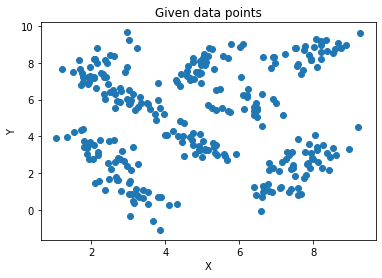

In [4]:
x = [d[0] for d in data]
y = [d[1] for d in data]
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Given data points')
plt.show()

In [5]:
def getRandomCentroids(data, k):
    """
    This method returns randomly chosen points from the given dataset as random k centroids
    """
    randomIndices = random.sample(range(len(data)), k)
    return [data[randIndex] for randIndex in randomIndices]
    #return data[randomIndices]

In [6]:
def getEuclideanDistance(dataPoint1, dataPoint2):
    """
    This method calculates the Euclidean distance between the given two points
    """
    distance = 0
    for i in range(len(dataPoint1)): #for n dimensions
        distance += (dataPoint1[i] - dataPoint2[i]) ** 2
    distance = math.sqrt(distance)
    return distance

In [7]:
def findMembershipAndClusters(data, k, centroids):
    """
    This method determines the best cluster for each data point given by comparing the distances to different centroids.
    Returns membership of all the data points, clusters with their respective data points, and squared distances to be used later
    """
    membership = [-1] * len(data)
    squaredDistances = [-1] * len(data) #squared distance of each point from its respective centroid
    clusters = [[] for i in range(k)]
    
    for i in range(len(data)):
        dataPoint = data[i]
        minDistance = getEuclideanDistance(dataPoint, centroids[0])
        appropriateCluster = 0
        for j in range(1, len(centroids)):
            distance = getEuclideanDistance(dataPoint, centroids[j])
            if(distance < minDistance):
                minDistance = distance
                appropriateCluster = j
        membership[i] = appropriateCluster
        squaredDistances[i] = minDistance ** 2
        clusters[membership[i]].append(dataPoint) 
        
    return (membership, clusters, squaredDistances)

In [8]:
def calculateCentroid(dataPoints): 
    """
    This method calculates the centroid of the given set of data points by taking the mean of those points
    """
    return sum(dataPoints)/len(dataPoints) #separately done for each axis

In [9]:
def areAllCentroidsSame(oldCentroids, newCentroids):
    """
    This method checks whether one set of centroids given has the same points as that of the other
    Returns true or false
    """
    for i in range(len(oldCentroids)):
        if (oldCentroids[i] != newCentroids[i]).any(): #if any of the values doesn't match
            return False
    return True

In [10]:
def calculateSumOfSquaredError(clusters, centroids): #cluster - list of lists
    """
    This method calculates the objective function Summation over(i = 1 to C) Summation over(x belongs to Di) ||X-mi||^2
    """
    result = 0
    for i in range(len(clusters)):
        for dataPoint in clusters[i]:
            result += (dataPoint - centroids[i]) ** 2
    return result

In [11]:
def kmeans(data, k, initial_centroids):
    """
    This method runs kmeans algorithm with the given initial centroids (either from Strategy 1 or Strategy 2)
    Returns the sum of squared distances (the objective function value) 
    """
    centroids = initial_centroids
    
    while(True):
        membership, clusters, squaredDistances = findMembershipAndClusters(data, k, centroids)
        oldCentroids = centroids.copy()
        for i in range(len(clusters)):
            centroids[i] = calculateCentroid(clusters[i])
        
        if(areAllCentroidsSame(oldCentroids, centroids)):
            break
    
    sse = sum(squaredDistances)
    return sse

## Strategy 1 : With k random initial centroids


Strategy 1: With k random initial centroids


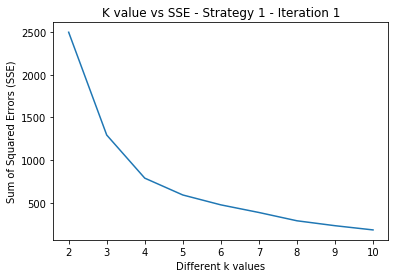

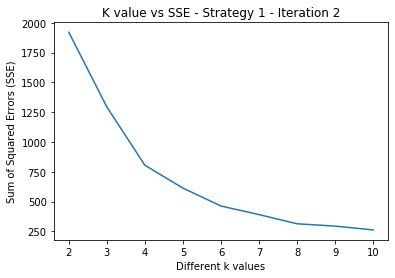

In [40]:
"""
The below code implements the strategy 1 - with k random initial centroids. 
"""
print('\nStrategy 1: With k random initial centroids')
for iteration in range(1,3): #run 2 times
    sse = []
    k_values = list(range(2, 11))
    for k in k_values:
        initial_random_centroids = getRandomCentroids(data, k) #initial centroids
        loss_function_value = kmeans(data, k, initial_random_centroids)
        sse.append(loss_function_value)
    plt.plot(k_values, sse)
    plt.xlabel('Different k values')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('K value vs SSE - Strategy 1 - Iteration ' + str(iteration))
    plt.show()

## Strategy 2 : With 1 random and k-1 max-avg-distance centroids

In [13]:
def getARandomCentroid(data):
    """
    This method returns a single random centroid
    """
    randomIndex = random.sample(range(len(data)), 1)[0]
    return data[randomIndex]

In [14]:
def getMaxAvgCentroids(data, k):
    """
    This method returns k centroids each with max-avg-distance from the previously taken centroids
    """
    centroids = []
    centroids.append(getARandomCentroid(data))
    while(len(centroids) < k):
        maxDistance = -1
        maxDistancePoint = -1
        for point in data:
            dis = 0
            dontInclude = False
            for centroid in centroids:
                if (point == centroid).all():
                    dontInclude = True
                    break
                dis += getEuclideanDistance(point, centroid)
            if dontInclude:
                continue
            dis /= len(centroids)
            if(dis > maxDistance):
                maxDistance = dis
                maxDistancePoint = point
        centroids.append(maxDistancePoint)
    return centroids


Strategy 2: With 1 random and k-1 max-avg-distance centroids


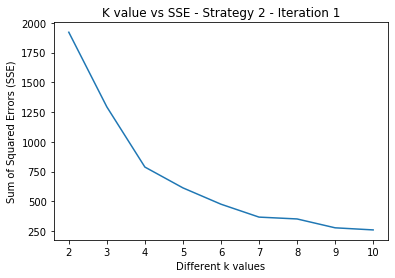

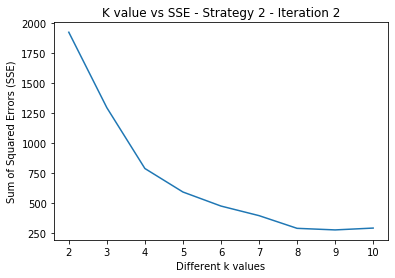

In [41]:
"""
The below code implements the strategy - With 1 random and k-1 max-avg-distance centroids¶
"""
print('\nStrategy 2: With 1 random and k-1 max-avg-distance centroids')
for iteration in range(1,3):
    sse = []
    k_values = list(range(2, 11))
    for k in k_values:
        initial_max_avg_centroids = getMaxAvgCentroids(data, k) #initial centroids
        loss_function_value = kmeans(data, k, initial_max_avg_centroids)
        sse.append(loss_function_value)
    plt.plot(k_values, sse)
    plt.xlabel('Different k values')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('K value vs SSE - Strategy 2 - Iteration ' + str(iteration))
    plt.show()